In [1]:
import pandas as pd #To handle with data 
import numpy as np #To math 
import seaborn as sns #to visualization
import matplotlib.pyplot as plt # to plot the graphs


from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.metrics import confusion_matrix,f1_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report,accuracy_score

from imblearn.under_sampling import RandomUnderSampler, NearMiss,CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours,TomekLinks
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.combine import SMOTEENN,SMOTETomek


%matplotlib inline
# plt.rcParams("figure.figsize") = (12,6)
# plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset
df_credit=pd.read_csv('C:/Users/Administrator/Downloads/creditcard.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#looking the type and searching for null values
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# The data is stardarized, I will explore them later
#For now I will look the "normal" columns
df_credit[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


# Firstly, I will explore through 3 different columns:
1.Time
2.Amount
3.Class

Distribuition of Normal(0) and Frauds(1): 
0    284315
1       492
Name: Class, dtype: int64


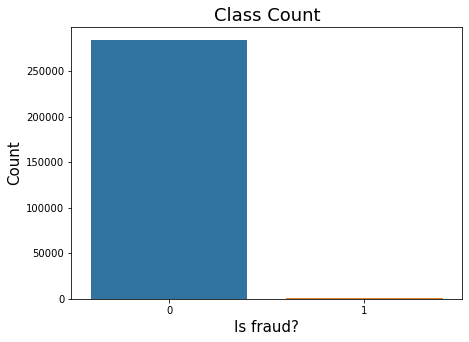

In [5]:
#Lets start looking the difference by Normal and Fraud transactions
print("Distribuition of Normal(0) and Frauds(1): ")
print(df_credit["Class"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_credit['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

We have a clearly imbalanced data.
It's very common when treating of frauds...

First I will do some explore through the Time and Amount.
Second I will explore the V's Features, that are PCA's

# Time Features and some Feature Engineering
As our Time feature are in seconds we will transform it ot minutes and hours to get a better understand of the patterns

In [6]:
timedelta = pd.to_timedelta(df_credit['Time'], unit='s')
df_credit['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df_credit['Time_hour'] = (timedelta.dt.components.hours).astype(int)

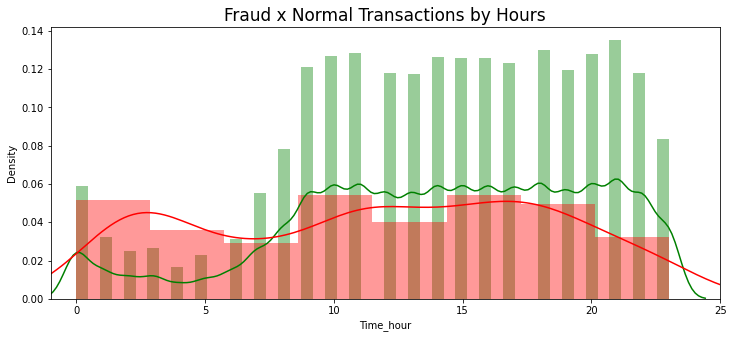

In [7]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(df_credit[df_credit['Class'] == 0]["Time_hour"], 
             color='g')
sns.distplot(df_credit[df_credit['Class'] == 1]["Time_hour"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

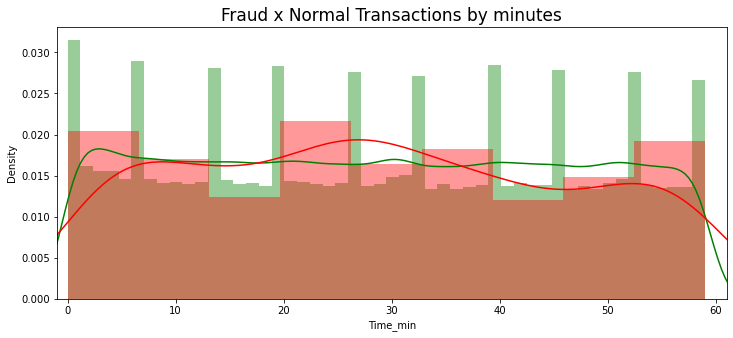

In [8]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(df_credit[df_credit['Class'] == 0]["Time_min"], 
             color='g')
sns.distplot(df_credit[df_credit['Class'] == 1]["Time_min"], 
             color='r')
plt.title('Fraud x Normal Transactions by minutes', fontsize=17)
plt.xlim([-1,61])
plt.show()

1.Interesting distribuition, but don't sounds like a clear pattern of action

# Looking the statistics of our Amount class frauds and normal transactions

In [9]:
#To clearly the data of frauds and no frauds
df_fraud = df_credit[df_credit['Class'] == 1]
df_normal = df_credit[df_credit['Class'] == 0]

print("Fraud transaction statistics")
print(df_fraud["Amount"].describe())
print("\nNormal transaction statistics")
print(df_normal["Amount"].describe())

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [10]:
#Feature engineering to a better visualization of the values
df_credit['Amount_log'] = np.log(df_credit.Amount + 0.01)

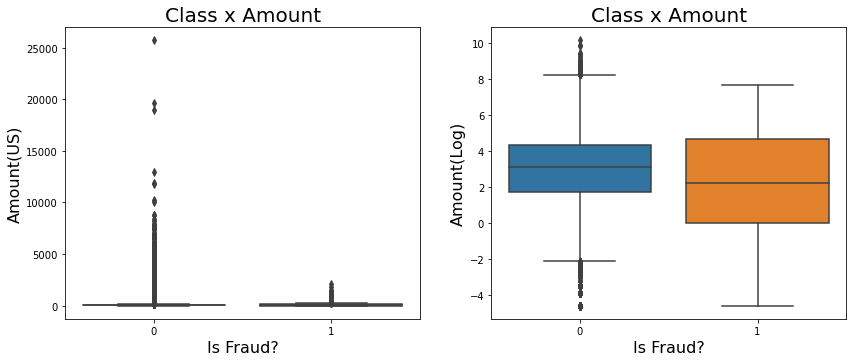

In [11]:
plt.figure(figsize=(14,6))
#I will explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=df_credit)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="Amount_log", data=df_credit)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

We can see a slightly difference in log amount of our two Classes.
The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have highest values

# Looking a scatter plot of the Time_min distribuition by Amount

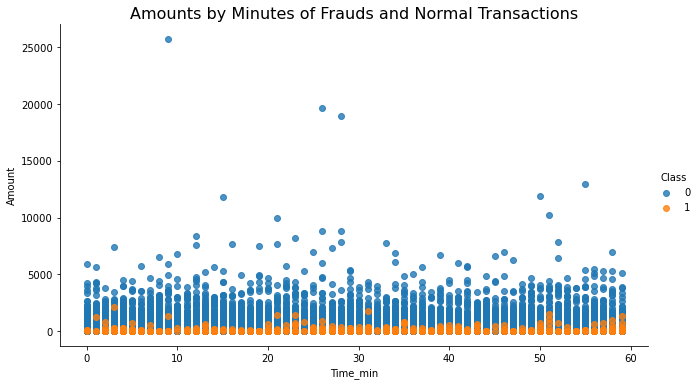

In [12]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df_credit, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

# Looking a scatter plot of the Time_hour distribuition by Amount

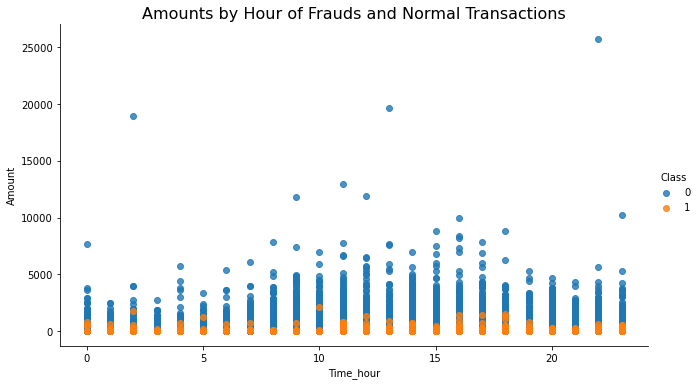

In [13]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=df_credit, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)

plt.show()

I will use boxplot to search differents distribuitions:
1.We are searching for features that diverges from normal distribution

In [14]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
# df_credit.Amount = np.log(df_credit.Amount + 0.001)
df_credit['std_Amount'] = scaler.fit_transform(df_credit['Amount'].values.reshape (-1,1))
df_credit = df_credit.drop("Amount", axis=1)

In [15]:

df_credit = df_credit[["Time_hour","Time_min","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","std_Amount","Class"]]

In [16]:
#Looking the final df
df_credit.head()

,Time_hour,Time_min,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,std_Amount,Class
0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,0,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,0,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,0,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


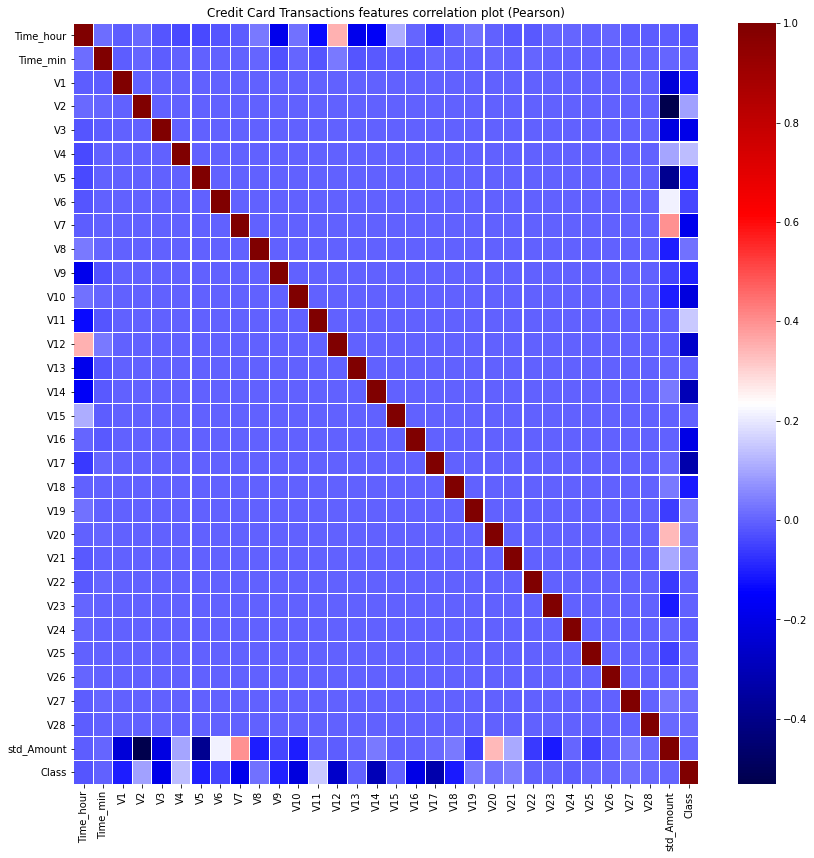

In [17]:
# colormap = plt.cm.Greens

plt.figure(figsize=(14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df_credit.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="seismic")
# sns.heatmap(df_credit.corr(),linewidths=0.1,vmax=1.0, 
#             square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

# Modelling Data Preparation

In [18]:
df_credit.shape

(284807, 32)

In [19]:
#### Independent and Dependent Features
X=df_credit.drop("Class",axis=1)
y=df_credit.Class

In [20]:
df_credit["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

1.This dataset is highly skewed towards the class 0(Legitimate Transaction)
2.Vanilla Version of ML model will not perform better because the accuracy will bias towards the Majority class.
3.We should deal with Imbalance dataset with various methods like (Over-sampling ,Under-Sampling and combination of both)

In [21]:
###Splitting the dataset for train and test###
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=10)

In [22]:
# plt.scatter(zip(*X_1)[0],zip(*X_1)[1],color='#labc9c')
# plt.scatter(zip(*X_2)[0],zip(*X_2)[1],color='#e67e22')

# x_coords = zip(*X_1)[0] + zip(*X_2)[0]
# y_coords =zip(*X_1)[1] + zip(*X_2)[1]
# plt.axis([min(x_coords), max(x_coords), min(y_coords), max(y_coords)])

# plt.title("Original Dataset")
# plt.show()

# Cross Validation  and Hyperparameter Tuning¶


In [23]:
class_weights = int(y_train.value_counts()[0]/y_train.value_counts()[1])

In [24]:
class_weights

566

In [25]:
from sklearn.linear_model import LogisticRegression
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),
      'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [26]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [27]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85286    16]
 [   50    91]]
0.9992275552122467
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.85      0.65      0.73       141

    accuracy                           1.00     85443
   macro avg       0.92      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



The confusion matrix shows 85286+91 = 85377 correct predictions and 16+50 = 66 are incorrect one.

True Positives: 91

True Negatives: 85286

False Positives: 16 (Type I error)

False Negatives: 50 ( Type II error)

In [28]:
y_pred_prob=clf.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of Not Fraud (0)','Prob of Fraud (1)'])
y_pred_prob_df.head()

,Prob of Not Fraud (0),Prob of Fraud (1)
0,0.999755,0.000245
1,0.999803,0.000197
2,0.998655,0.001345
3,0.999834,0.000166
4,0.999682,0.000318


In [29]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
# plt.plot(fpr,tpr)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.title('ROC curve for Fraud classifier')
# plt.xlabel('False positive rate (1-Specificity)')
# plt.ylabel('True positive rate (Sensitivity)')
# plt.grid(True)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

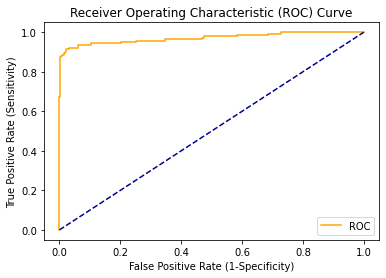

In [30]:
plot_roc_curve(fpr,tpr)

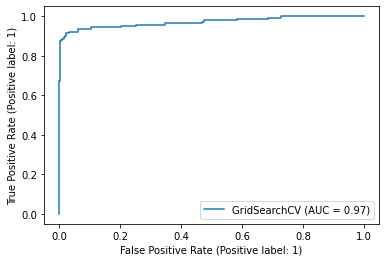

In [31]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,X =X_test, y= y_test)


# Using Ensemble model

In [117]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF=RandomForestClassifier(criterion='gini',max_depth=10, min_samples_split=5,min_samples_leaf=1)
# params={'n_estimators':[100,200,500],
#         'criterion':['entropy','gini'],
#         'max_depth':[3,4,5,6]}
# cv=KFold(n_splits=5,random_state=None,shuffle=False)
# class_weight={0: 1, 1:class_weights}

In [118]:
# clf_RF=GridSearchCV(classifier_RF,params,n_jobs=-1,scoring='f1_macro')
classifier_RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [119]:
y_pred=classifier_RF.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85298     4]
 [   27   114]]
0.9996371850239341
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.97      0.81      0.88       141

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [35]:
from imblearn.ensemble import BalancedRandomForestClassifier
classifier_BRF = BalancedRandomForestClassifier()

In [36]:
classifier_BRF.fit(X_train,y_train)

BalancedRandomForestClassifier()

In [37]:
y_pred=classifier_BRF.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[83035  2267]
 [   12   129]]
0.9733272474047026
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85302
           1       0.05      0.91      0.10       141

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.54     85443
weighted avg       1.00      0.97      0.99     85443



In [38]:
import xgboost as xgb
clf_Xg = xgb.XGBClassifier()

In [39]:
clf_Xg.fit(X_train,y_train)

[08:23:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
y_pred=clf_Xg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85298     4]
 [   27   114]]
0.9996371850239341
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.97      0.81      0.88       141

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [41]:
import xgboost as xgb
clf_Xg = xgb.XGBClassifier(scale_pos_weight = class_weights)

In [42]:
clf_Xg.fit(X_train,y_train)

[08:25:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=566, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_pred=clf_Xg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85294     8]
 [   23   118]]
0.9996371850239341
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.94      0.84      0.88       141

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



# Under-Sampling Techniques

In Undersampling techniques, the no.of majority class instances are Removed to balance the minority class
Disadvantage:
    Loss of Information about the majority class.

In [44]:
from collections import Counter
Counter(y_train)

Counter({0: 199013, 1: 351})

In [45]:
###Random undersampling method###
from imblearn.under_sampling import RandomUnderSampler
Random_US = RandomUnderSampler(0.5)
X_train_us,y_train_us=Random_US.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_us)))

The number of classes before fit Counter({0: 199013, 1: 351})
The number of classes after fit Counter({0: 702, 1: 351})


In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF=RandomForestClassifier()

In [47]:
classifier_RF.fit(X_train_us,y_train_us)

RandomForestClassifier()

In [48]:
y_pred=classifier_RF.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[84188  1114]
 [   14   127]]
0.9867982163547628
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85302
           1       0.10      0.90      0.18       141

    accuracy                           0.99     85443
   macro avg       0.55      0.94      0.59     85443
weighted avg       1.00      0.99      0.99     85443



In [49]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),
      'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [50]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=1,scoring='f1_macro')
clf.fit(X_train_us,y_train_us)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [51]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[84458   844]
 [   15   126]]
0.9899465140503025
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85302
           1       0.13      0.89      0.23       141

    accuracy                           0.99     85443
   macro avg       0.56      0.94      0.61     85443
weighted avg       1.00      0.99      0.99     85443



# Near Miss Undersampling
Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.
NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
NearMiss-3: Majority class examples with minimum distance to each minority class example.

In [52]:
# Undersample imbalanced dataset with NearMiss-1
from imblearn.under_sampling import NearMiss
NS = NearMiss(0.5,version=1, n_neighbors=3)
# transform the dataset
X_train_ns,y_train_ns=NS.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 199013, 1: 351})
The number of classes after fit Counter({0: 702, 1: 351})


In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF=RandomForestClassifier()

In [54]:
classifier_RF.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [55]:
y_pred=classifier_RF.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[61866 23436]
 [    8   133]]
0.7256182484229252
              precision    recall  f1-score   support

           0       1.00      0.73      0.84     85302
           1       0.01      0.94      0.01       141

    accuracy                           0.73     85443
   macro avg       0.50      0.83      0.43     85443
weighted avg       1.00      0.73      0.84     85443



In [56]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),
      'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [57]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=1,scoring='f1_macro')
clf.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [58]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[83558  1744]
 [   15   126]]
0.9794131760354856
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85302
           1       0.07      0.89      0.13       141

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [59]:
# Undersample imbalanced dataset with NearMiss-2
from imblearn.under_sampling import NearMiss
NS = NearMiss(0.5,version=2, n_neighbors=3)
# transform the dataset
X_train_ns,y_train_ns=NS.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 199013, 1: 351})
The number of classes after fit Counter({0: 702, 1: 351})


In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF=RandomForestClassifier()

In [61]:
classifier_RF.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [62]:
y_pred=classifier_RF.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 7794 77508]
 [    2   139]]
0.09284552274615826
              precision    recall  f1-score   support

           0       1.00      0.09      0.17     85302
           1       0.00      0.99      0.00       141

    accuracy                           0.09     85443
   macro avg       0.50      0.54      0.09     85443
weighted avg       1.00      0.09      0.17     85443



In [63]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),
      'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [64]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=1,scoring='f1_macro')
clf.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [65]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[67708 17594]
 [   22   119]]
0.7938274639233173
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     85302
           1       0.01      0.84      0.01       141

    accuracy                           0.79     85443
   macro avg       0.50      0.82      0.45     85443
weighted avg       1.00      0.79      0.88     85443



In [66]:
# Undersample imbalanced dataset with NearMiss-3
from imblearn.under_sampling import NearMiss
NS = NearMiss(0.5,version=3, n_neighbors=3)
# transform the dataset
X_train_ns,y_train_ns=NS.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 199013, 1: 351})
The number of classes after fit Counter({0: 396, 1: 351})


In [67]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF=RandomForestClassifier()

In [68]:
classifier_RF.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [69]:
y_pred=classifier_RF.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85133   169]
 [   24   117]]
0.997741184181267
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.41      0.83      0.55       141

    accuracy                           1.00     85443
   macro avg       0.70      0.91      0.77     85443
weighted avg       1.00      1.00      1.00     85443



In [70]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),
      'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [71]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=1,scoring='f1_macro')
clf.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [72]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[84810   492]
 [   28   113]]
0.993914071369217
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85302
           1       0.19      0.80      0.30       141

    accuracy                           0.99     85443
   macro avg       0.59      0.90      0.65     85443
weighted avg       1.00      0.99      1.00     85443



# Tomek Links for Undersampling

In [73]:
from imblearn.under_sampling import TomekLinks
TL = TomekLinks()
# transform the dataset
X_train_tl,y_train_tl=TL.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_tl)))

The number of classes before fit Counter({0: 199013, 1: 351})
The number of classes after fit Counter({0: 198993, 1: 351})


In [74]:
classifier_RF=RandomForestClassifier()

In [75]:
classifier_RF.fit(X_train_tl,y_train_tl)

RandomForestClassifier()

In [76]:
y_pred=classifier_RF.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85296     6]
 [   24   117]]
0.9996488887328394
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.95      0.83      0.89       141

    accuracy                           1.00     85443
   macro avg       0.98      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [77]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),
      'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [78]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=1,scoring='f1_macro')
clf.fit(X_train_tl,y_train_tl)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [79]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85284    18]
 [   48    93]]
0.9992275552122467
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.84      0.66      0.74       141

    accuracy                           1.00     85443
   macro avg       0.92      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



# Over Sampling Techniques

In Over sampling techniques, the no.of minority class instances are duplicated or Replicated to balance the majority class
Disadvantage:
    May Lead to Overfitting.

In [80]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.5)
X_train_os,y_train_os=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 199013, 1: 351})
The number of classes after fit Counter({0: 199013, 1: 99506})


In [81]:
classifier_RF=RandomForestClassifier()

In [82]:
classifier_RF.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [83]:
y_pred=classifier_RF.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85298     4]
 [   25   116]]
0.9996605924417448
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.97      0.82      0.89       141

    accuracy                           1.00     85443
   macro avg       0.98      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [84]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),
      'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [85]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=1,scoring='f1_macro')
clf.fit(X_train_os,y_train_os)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [86]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[84180  1122]
 [   12   129]]
0.9867279941013307
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85302
           1       0.10      0.91      0.19       141

    accuracy                           0.99     85443
   macro avg       0.55      0.95      0.59     85443
weighted avg       1.00      0.99      0.99     85443



# Combined Techniques Sampling

In [87]:
from imblearn.combine import SMOTETomek
ST = SMOTETomek(0.5)
X_train_st,y_train_st=ST.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 199013, 1: 351})
The number of classes after fit Counter({0: 199013, 1: 99506})


In [123]:
classifier_RF=RandomForestClassifier()

In [124]:
classifier_RF.fit(X_train_st,y_train_st)

RandomForestClassifier()

In [125]:
y_pred=classifier_RF.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85292    10]
 [   21   120]]
0.9996371850239341
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.92      0.85      0.89       141

    accuracy                           1.00     85443
   macro avg       0.96      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443

